# Oasis Infobyte - Data Science - 
## Batch - December Phase 1 OIBSIP


### Task 5 : Sales Prediction Using Python

### credits : Saya Vamshi Krishna

# Problem Statement :

  Sales Prediction means predicting how much of a product people will buy based on factors such as the amount you spend to advertise your product, the segment of people you advertise for, or the platform you are advertising on about your product.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Loading the Dataset :

In [2]:
sales_df = pd.read_csv('Advertising.csv')

In [3]:
sales_df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
#Dropping the unnamed column
sales_df.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
sales_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Data Information :

In [6]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


**Observation :There are no null values present within the dataset, and each column is uniformly composed of floating-point numerical data types**.

### Data Description :

In [7]:
sales_df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


**Observation :**

**The sales average stands at 14,000 units, with the maximum reaching 27,000 units. The highest expenditures on advertising are 296 dollars on TV, 50 dollars on Radio, and 114 dollars on Newspaper, while the least amount is allocated to Radio advertising**.

### Exploratory Data Analysis :

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


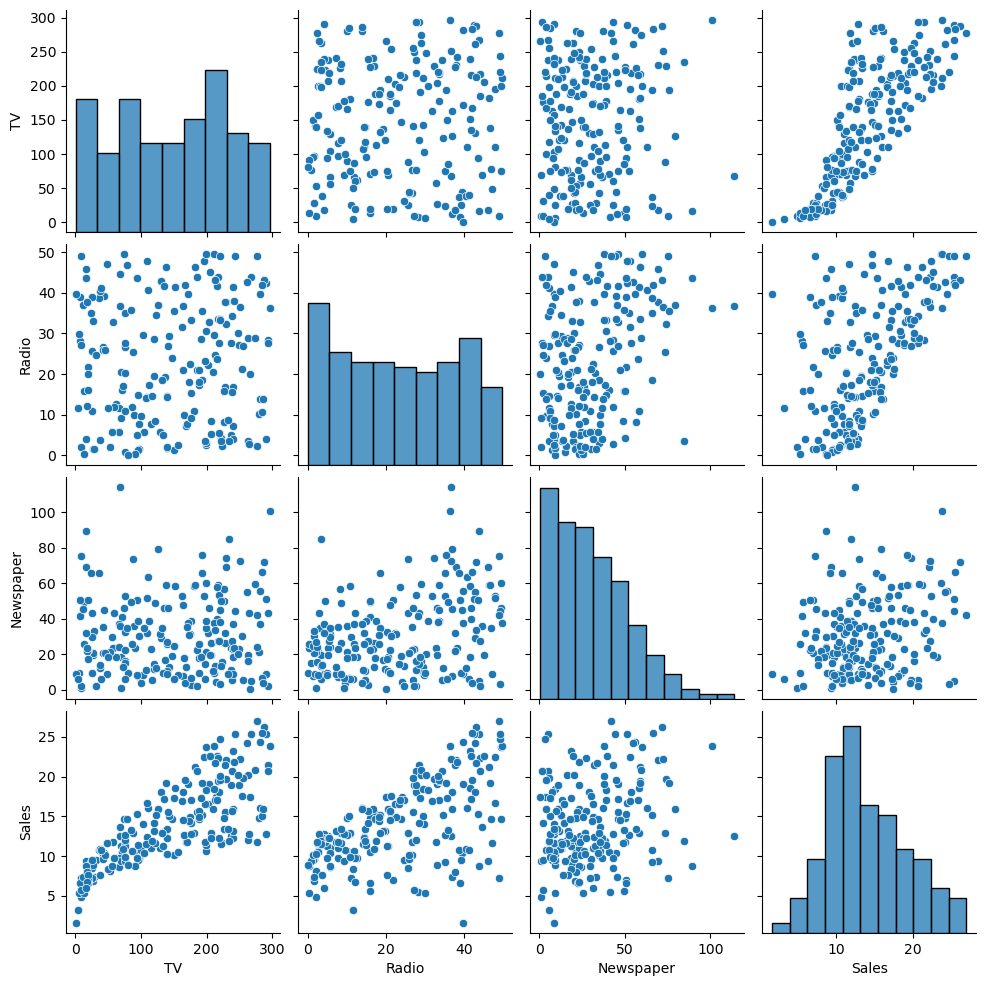

In [8]:

# Display the first few rows of the dataset to ensure it loaded correctly
print(sales_df.head())

# Create a pairplot using Seaborn
sns.pairplot(sales_df, )
plt.show()

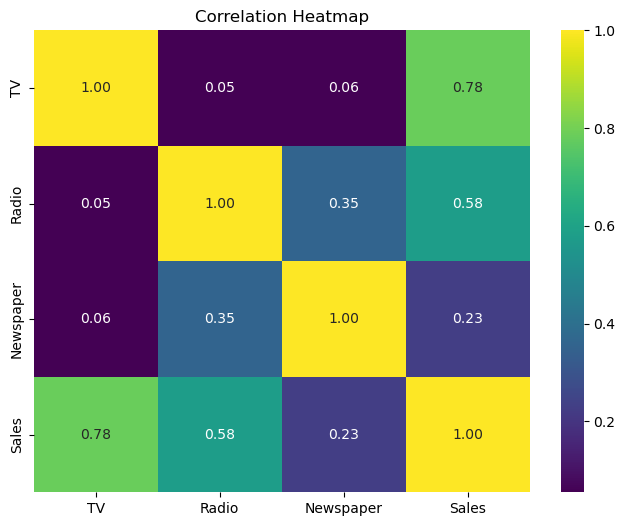

In [9]:
correlation_matrix = sales_df.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**Observation :**

***TV advertising exhibits a robust correlation with sales, indicating a strong relationship. However, the association between radio advertising and sales is comparatively weaker. Moreover, the connection between newspaper advertising and sales is notably feeble.***

### Train Test Split :

In [10]:
x = sales_df.drop('Sales', axis = 1)
y = sales_df['Sales']

In [11]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [12]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [14]:
#checking the shape after train-test split
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


### Data Standardization :

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Model Development and Evaluation :

In [16]:
#importing the metrics required for evaluation

from sklearn import metrics 

### Linear Regression :

In [17]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [18]:
#Predicting on train data
y_pred_train = lin_reg.predict(x_train)

#Predicting on test data
y_pred_test = lin_reg.predict(x_test)

Plotting a regplot to see how our model is performing on test data

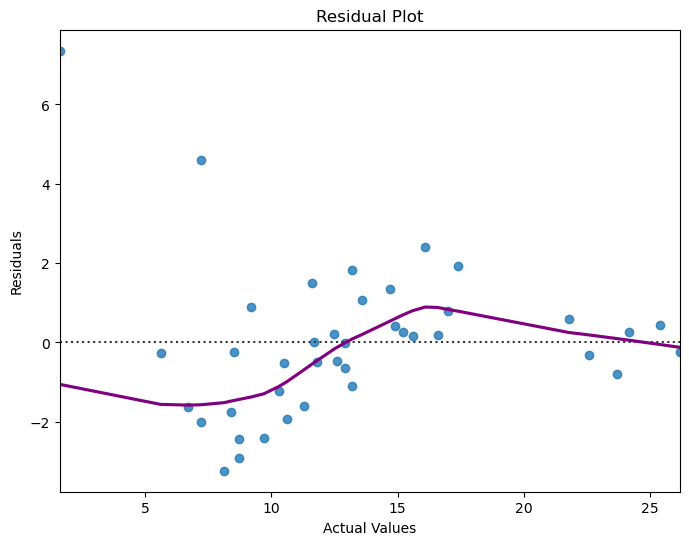

In [19]:
# Assuming y_test and y_pred_test are your actual and predicted values
plt.figure(figsize=(8, 6))
sns.residplot(x=y_test, y=y_pred_test, lowess=True, line_kws={'color': 'purple'})
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

**Model Evaluation :**

Computing the MSE for our Sales predictions

In [20]:
# Mean Squared Error
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

In [21]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 2.406814755818906
MSE for test set is 4.402118291449689


Computing the RMSE for our Sales predictions

In [22]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [23]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 1.5513912323520802
RMSE for test set is 2.0981225634956813


**Model Evaluation using R2_score :**

In [24]:
r2_train = metrics.r2_score(y_train,y_pred_train)
r2_test = metrics.r2_score(y_test,y_pred_test)
print("R2 score for training set is {}".format(r2_train))
print("R2 score for test set is {}".format(r2_test))

R2 score for training set is 0.9067114990146383
R2 score for test set is 0.8601145185017867


As we can see r2 score for test set is **0.86**.

### Thank You